In [6]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [725]:
# market = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Prices and NIV.xlsx")
# GB_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/GB Prices.xlsx")
historic_gas_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Historic Gas Prices.xlsx")
# wind_demand = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Wind and Demand.xlsx", sheet_name= 1, header= 1)


In [41]:
# import files

historic_gas_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Historic Gas Prices.xlsx")
GB_price = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/GB Prices.xlsx")
market = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Prices and NIV.xlsx")
wind_demand = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Wind and Demand.xlsx", sheet_name= 1, header= 1)
actual_wind_demand = pd.read_excel("D:/UK/assignment/DSA8023/Analython_3/Wind and Demand.xlsx", header= 1)


In [702]:
print('GB_price', GB_price.shape)
print('historic_gas_price', historic_gas_price.shape)
print('market', market.shape)
print('wind_demand', wind_demand.shape)
print('actual_wind_demand', actual_wind_demand.shape)


GB_price (40608, 7)
historic_gas_price (844, 3)
market (39355, 10)
wind_demand (40510, 7)
actual_wind_demand (40508, 5)


In [468]:
# considering time slots as categorical 
time_slots = ['23:00:00', '23:30:00', '00:00:00', '00:30:00', '01:00:00',
       '01:30:00', '02:00:00', '02:30:00', '03:00:00', '03:30:00',
       '04:00:00', '04:30:00', '05:00:00', '05:30:00', '06:00:00',
       '06:30:00', '07:00:00', '07:30:00', '08:00:00', '08:30:00',
       '09:00:00', '09:30:00', '10:00:00', '10:30:00', '11:00:00',
       '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00',
       '16:30:00', '17:00:00', '17:30:00', '18:00:00', '18:30:00',
       '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00',
       '21:30:00', '22:00:00', '22:30:00']

ida2_trade_time = ['11:00:00',
       '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00',
       '16:30:00', '17:00:00', '17:30:00', '18:00:00', '18:30:00',
       '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00',
       '21:30:00', '22:00:00', '22:30:00']

ida3_trade_time = ['17:00:00', '17:30:00', '18:00:00', '18:30:00',
       '19:00:00', '19:30:00', '20:00:00', '20:30:00', '21:00:00',
       '21:30:00', '22:00:00', '22:30:00']

In [503]:
def convert_dtypes(df, targ_cols, convert_to):
    cols = df.columns
    for col in cols:
        if col in targ_cols:
            if convert_to == 'date':
                df[col] = pd.to_datetime(df[col], dayfirst=True).dt.normalize()
            elif convert_to == 'time' :
                df[col] = pd.to_datetime(df[col], dayfirst=True).time.normalize()
            else:
                df[col] = df[col].values.astype(convert_to)
    return df

def get_time_slots_cat(time): 
    return time_slots.index(time)

def getYear(data):
    return pd.to_datetime(data, dayfirst=True).to_period('Y')

In [683]:
# GB_price = GB_price.rename(columns= {'Start Date Time': 'start_date','Trade Date': 'trade_date', 'Start Time': 'start_time','GB Price (€/MWh)': 'gb_price'})

# GB_price = convert_dtypes(GB_price, ['trade_date', 'start_date'], 'date')
# GB_price['year'] = GB_price['start_date'].apply(getYear)
# GB_price['start_time_cat'] = GB_price['start_time'].apply(get_time_slots_cat)
# GB_price['start_date_time'] = GB_price['start_date'].astype(str) + ' ' + GB_price['start_time']

# https://tradingeconomics.com/united-kingdom/electricity-price


temp_GB_price = GB_price.copy()
temp_GB_price['rolling_gb_price'] = GB_price['gb_price'].rolling(30).mean()

indexes = GB_price[GB_price['gb_price'] < 10].index.to_list()
GB_price.loc[indexes, 'gb_price'] = temp_GB_price.loc[indexes, 'rolling_gb_price'].values

indexes = GB_price[GB_price['gb_price'] > 600].index.to_list()  #all time high in Sept 2022 as April 2023
GB_price.loc[indexes, 'gb_price'] = temp_GB_price.loc[indexes, 'rolling_gb_price'].values


<AxesSubplot: >

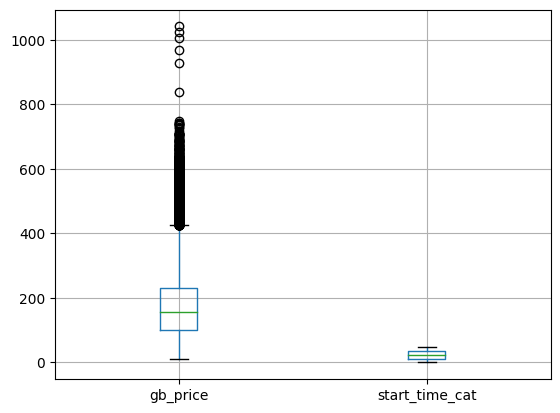

In [684]:
GB_price.boxplot()

(844, 3)

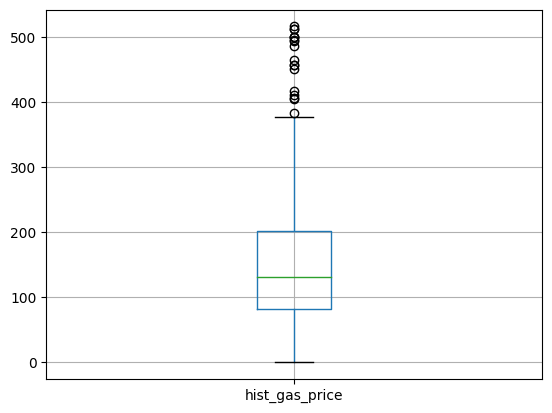

In [726]:
historic_gas_price = historic_gas_price.rename(columns= {'Date': 'date','Gas Price £/Therm': 'hist_gas_price'})

historic_gas_price['year'] = historic_gas_price['date'].apply(getYear)
historic_gas_price = convert_dtypes(historic_gas_price, ['date'], 'date')
historic_gas_price.boxplot()

temp_historic_gas_price = historic_gas_price.copy()
temp_historic_gas_price['rolling_hist_gas_price'] = historic_gas_price['hist_gas_price'].rolling(30).mean()

indexes = historic_gas_price[historic_gas_price['hist_gas_price'] < 10].index.to_list()
historic_gas_price.loc[indexes, 'hist_gas_price'] = temp_historic_gas_price.loc[indexes, 'rolling_hist_gas_price'].values
 

historic_gas_price.shape

In [696]:
# clean up wind demand dataset

if 'Unnamed: 0' in wind_demand.columns:
    wind_demand = wind_demand.drop(columns=['Unnamed: 0'])

wind_demand = wind_demand.rename(columns= {'Start Date': 'start_date','Trade Date': 'trade_date', 'Start Time 30 Minute Period': 'start_time','Demand (MW)': 'demand'})

wind_demand['year'] = wind_demand['start_date'].apply(getYear)
wind_demand = convert_dtypes(wind_demand, ['trade_date', 'start_date'], 'date')
wind_demand['start_time_cat'] = wind_demand['start_time'].apply(get_time_slots_cat)
wind_demand['start_date_time'] = wind_demand['start_date'].astype(str) + ' ' + wind_demand['start_time']


temp_wind_demand = wind_demand.copy()
temp_wind_demand['rolling_demand'] = wind_demand['demand'].rolling(30).mean()

indexes = wind_demand[wind_demand['demand'] < 0].index.to_list()
wind_demand.loc[indexes, 'demand'] = temp_wind_demand.loc[indexes, 'rolling_demand'].values

wind_demand.shape

(40510, 7)

In [733]:
if 'Unnamed: 0' in actual_wind_demand.columns:
    actual_wind_demand = actual_wind_demand.drop(columns=['Unnamed: 0'])

actual_wind_demand = actual_wind_demand.rename(columns= {'Start Date': 'start_date','Trade Date': 'trade_date', 'Start Time 30 Minute Period': 'start_time','Actual Wind (MW)': 'wind'})

actual_wind_demand['year'] = actual_wind_demand['start_date'].apply(getYear)
actual_wind_demand = convert_dtypes(actual_wind_demand, ['trade_date', 'start_date'], 'date')
actual_wind_demand['start_time_cat'] = actual_wind_demand['start_time'].apply(get_time_slots_cat)
actual_wind_demand['start_date_time'] = actual_wind_demand['start_date'].astype(str) + ' ' + actual_wind_demand['start_time']


temp_actual_wind_demand = actual_wind_demand.copy()
temp_actual_wind_demand['rolling_wind'] = actual_wind_demand['wind'].rolling(30).mean()

indexes = actual_wind_demand[actual_wind_demand['wind'] < 0].index.to_list()
actual_wind_demand.loc[indexes, 'wind'] = temp_actual_wind_demand.loc[indexes, 'rolling_wind'].values


actual_wind_demand



,trade_date,start_date,start_time,wind,year,start_time_cat,start_date_time
0,2021-01-01,2020-12-31,23:00:00,2690,2020,0,2020-12-31 23:00:00
1,2021-01-01,2020-12-31,23:30:00,2571,2020,1,2020-12-31 23:30:00
2,2021-01-01,2021-01-01,00:00:00,2506,2021,2,2021-01-01 00:00:00
3,2021-01-01,2021-01-01,00:30:00,2513,2021,3,2021-01-01 00:30:00
4,2021-01-01,2021-01-01,01:00:00,2503,2021,4,2021-01-01 01:00:00
...,...,...,...,...,...,...,...
40503,2023-04-24,2023-04-24,20:30:00,559,2023,43,2023-04-24 20:30:00
40504,2023-04-24,2023-04-24,21:00:00,621,2023,44,2023-04-24 21:00:00
40505,2023-04-24,2023-04-24,21:30:00,645,2023,45,2023-04-24 21:30:00
40506,2023-04-24,2023-04-24,22:00:00,643,2023,46,2023-04-24 22:00:00


In [720]:

# if 'Unnamed: 0' in market.columns:
#     market = market.drop(columns=['Unnamed: 0'])
#     market.columns = ['start_date', 'trade_date', 'start_time', 'DAM', 'IDA1', 'IDA2', 'IDA3', "BM", 'net_volume']

# if market.iloc[0,0] == 'Start Date':
#     market = market.drop(index=[0])


# market['year'] = market['start_date'].apply(getYear)
# market = convert_dtypes(market, ['trade_date', 'start_date'], 'date')
# market['start_time_cat'] = market['start_time'].apply(get_time_slots_cat)
# market['start_date_time'] = market['start_date'].astype(str) + ' ' + market['start_time']

# # type casting
# market['DAM'] = market['DAM'].astype(float)
# market['IDA1'] = market['IDA1'].astype(float)
# market['IDA2'] = market['IDA2'].astype(float)
# market['IDA3'] = market['IDA3'].astype(float)
# market['BM'] = market['BM'].astype(float)
# market['net_volume'] = market['net_volume'].astype(float)

# removing negative and zero values

temp_market = market.copy()
temp_market['rolling_DAM'] = market['DAM'].rolling(30).mean()
temp_market['rolling_IDA1'] = market['IDA1'].rolling(30).mean()
temp_market['rolling_IDA2'] = market['IDA2'].dropna().rolling(30).mean()
temp_market['rolling_IDA3'] = market['IDA3'].dropna().rolling(30).mean()
temp_market['rolling_BM'] = market['BM'].rolling(30).mean()


indexes = market[market['DAM'] < 10].index.to_list()
market.loc[indexes, 'DAM'] = temp_market.loc[indexes, 'rolling_DAM'].values

indexes = market[market['IDA1'] < 10].index.to_list()
market.loc[indexes, 'IDA1'] = temp_market.loc[indexes, 'rolling_IDA1'].values

indexes = market[market['BM'] < 10].index.to_list()
market.loc[indexes, 'BM'] = temp_market.loc[indexes, 'rolling_BM'].values

# market.describe(include='all', datetime_is_numeric=True)
# market.isna().sum()

# since we cant drop by na values in ida3, ida4 
# getting indexes with values less than 10 and removing in market
temp_df = (market.sort_values(by="IDA3").head(10)['IDA3'] < 10).to_frame()
IDA3_neg_invalid_idxs = temp_df[temp_df['IDA3']].index.to_list()
temp_df = (market.sort_values(by="IDA2").head(10)['IDA2'] < 10).to_frame()
IDA2_neg_invalid_idxs = temp_df[temp_df['IDA2']].index.to_list()

market.loc[IDA2_neg_invalid_idxs, 'IDA2'] = temp_market.loc[IDA2_neg_invalid_idxs, 'rolling_IDA2'].values
market.loc[IDA3_neg_invalid_idxs, 'IDA3'] = temp_market.loc[IDA3_neg_invalid_idxs, 'rolling_IDA3'].values

market.describe(include='all', datetime_is_numeric=True)

# cleaned data shape
market.shape


# identifying best price within Day ahead market, intra day markets
best_market = []
best_market_price = []
for index, row in market.iterrows():
    market_template = ['DAM','IDA1','IDA2','IDA3'] #,'BM']
    tempRow = [row['DAM'],row['IDA1'],row['IDA2'],row['IDA3'] ] #, row['BM']]
    minVal = min(tempRow)
    minvalIndex = tempRow.index(minVal)
    bestMarket = market_template[minvalIndex]
    best_market.append(bestMarket)
    best_market_price.append(minVal)
    
market['best_market'] = best_market
market['best_market_price'] = best_market_price

In [52]:
# # considering 3 timeseries based on market opening timings

# market_1 = market[market['IDA2'].isna() & market['IDA3'].isna()]
# market_2 = market[(~market['IDA2'].isna()) & market['IDA3'].isna()]
# market_3 = market[(~market['IDA2'].isna()) & (~market['IDA3'].isna())]

# print(market_1.shape)
# print(market_2.shape)
# print(market_2.shape)
# # print(market_4.shape)

# len(market) - (len(market_1) + len(market_2) +len(market_3))

# market[(market['IDA2'].isna()) & (~market['IDA3'].isna())]

# market[~(market['start_date'] == '2021-06-28')]

# # IDA2 data for 28-06-2021 is missing

In [721]:
market.describe()

,DAM,IDA1,IDA2,IDA3,BM,net_volume,start_time_cat,best_market_price
count,39354.000000,39354.000000,19656.000000,9840.000000,39350.000000,39354.000000,39354.000000,39354.000000
mean,179.594439,177.405154,190.689491,198.735932,180.265463,43.269717,23.502897,164.839831
std,99.974628,100.135651,102.685675,109.570241,128.658369,309.049910,13.852643,94.092159
min,10.000000,10.000000,9.000000,10.000000,1.750567,-1707.240000,0.000000,9.000000
25%,101.000000,100.000000,111.037500,113.277500,90.780000,-141.825000,12.000000,91.200000
50%,162.490000,160.395000,174.455000,182.510000,158.195000,34.374000,24.000000,150.000000
75%,233.657500,230.000000,245.840000,266.000000,241.590000,221.337000,36.000000,216.000000
max,705.470000,750.000000,757.680000,661.041000,4680.000000,2032.908000,47.000000,601.310000


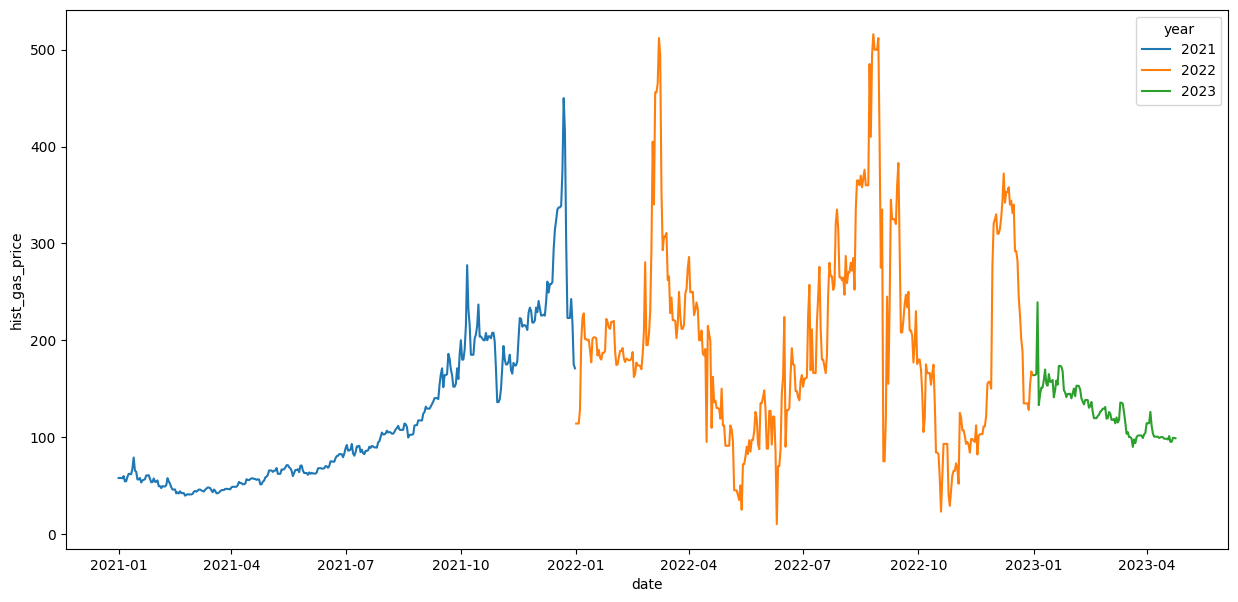

In [728]:
plt.figure(figsize=[15,7])
sns.lineplot(data=historic_gas_price, x='date', y='hist_gas_price', hue='year');
plt.show()

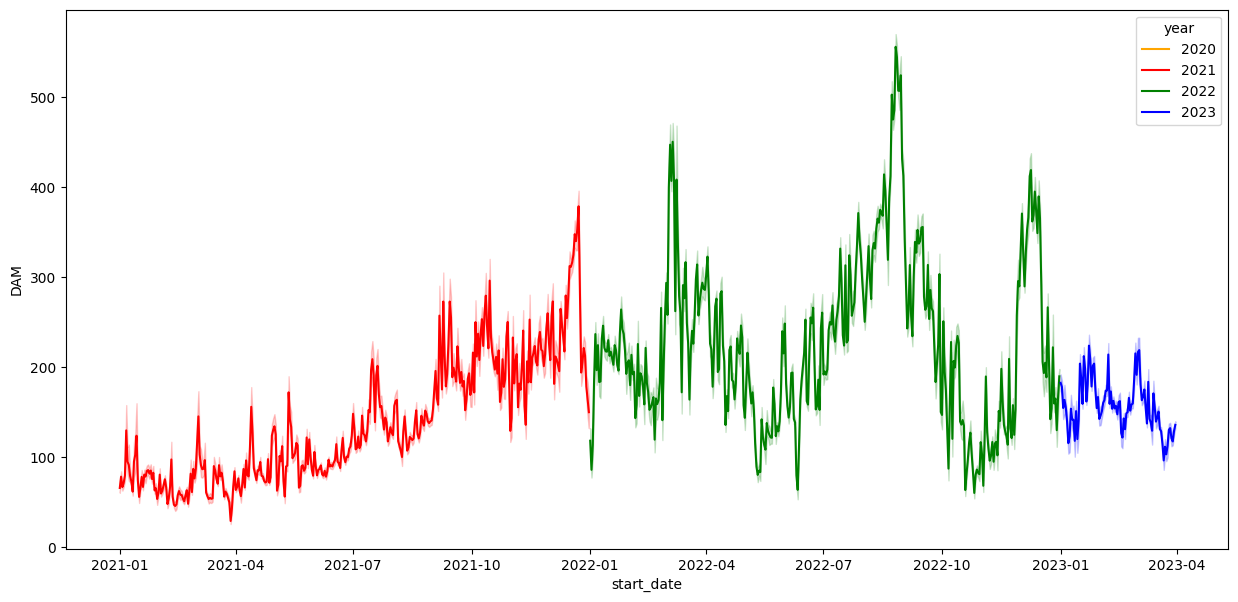

In [729]:
plt.figure(figsize=[15,7])
sns.lineplot(data=market, x='start_date', y='DAM', hue='year', palette=['orange','red', 'green', 'blue']);
plt.show()

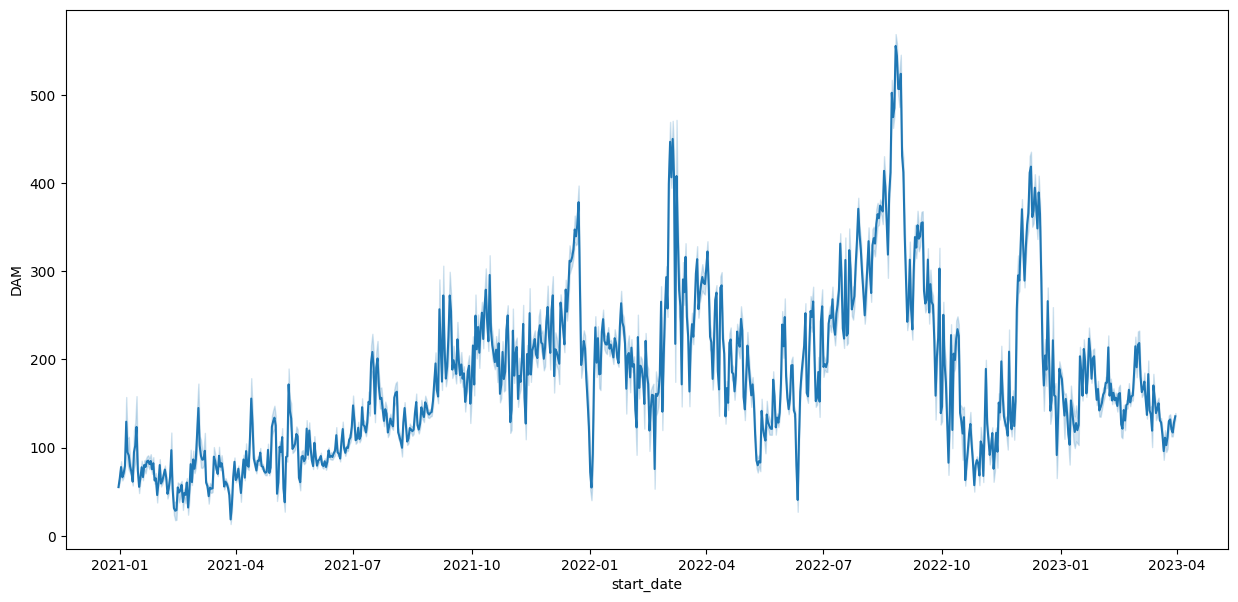

In [56]:
# plt.figure(figsize=[15,7])
# sns.lineplot(data=market, x='start_date', y='DAM');
# plt.show()

In [730]:
market

,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat,start_date_time,best_market,best_market_price
1,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488,2020,0,2020-12-31 23:00:00,DAM,55.09
2,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496,2020,1,2020-12-31 23:30:00,DAM,55.09
3,2021-01-01,2021-01-01,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048,2021,2,2021-01-01 00:00:00,DAM,54.02
4,2021-01-01,2021-01-01,00:30:00,54.02,67.00,NaN,NaN,25.95,-153.720,2021,3,2021-01-01 00:30:00,DAM,54.02
5,2021-01-01,2021-01-01,01:00:00,53.00,64.00,NaN,NaN,26.06,-86.304,2021,4,2021-01-01 01:00:00,DAM,53.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39350,2023-03-31,2023-03-31,20:30:00,135.80,125.11,115.00,105.00,100.52,-71.112,2023,43,2023-03-31 20:30:00,IDA3,105.00
39351,2023-03-31,2023-03-31,21:00:00,132.38,136.68,127.72,119.41,103.30,-128.352,2023,44,2023-03-31 21:00:00,IDA3,119.41
39352,2023-03-31,2023-03-31,21:30:00,132.38,125.00,112.70,113.12,103.35,-189.444,2023,45,2023-03-31 21:30:00,IDA2,112.70
39353,2023-03-31,2023-03-31,22:00:00,121.40,131.25,121.00,119.17,103.97,-112.740,2023,46,2023-03-31 22:00:00,IDA3,119.17


In [734]:
final_df = market.merge(wind_demand.drop(columns=['trade_date','start_date','start_time','year','start_time_cat']), how="inner", on = "start_date_time")
final_df = final_df.merge(actual_wind_demand.drop(columns=['trade_date','start_date','start_time','year','start_time_cat']), how="inner", on = "start_date_time")
final_df = final_df.merge(GB_price.drop(columns=['trade_date','start_date','start_time','year','start_time_cat']), how="inner", on = "start_date_time")
final_df = final_df.merge(historic_gas_price.drop(columns=['year']), how="inner", right_on="date", left_on="trade_date").drop(columns=['date'])



In [737]:
final_df

,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat,start_date_time,best_market,best_market_price,demand,wind,gb_price,hist_gas_price
0,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.488,2020,0,2020-12-31 23:00:00,DAM,55.09,4209,2690,74.97900,57.75
1,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.496,2020,1,2020-12-31 23:30:00,DAM,55.09,4159,2571,74.97900,57.75
2,2021-01-01,2021-01-01,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.048,2021,2,2021-01-01 00:00:00,DAM,54.02,4016,2506,75.53440,57.75
3,2021-01-01,2021-01-01,00:30:00,54.02,67.00,NaN,NaN,25.95,-153.720,2021,3,2021-01-01 00:30:00,DAM,54.02,3891,2513,75.53440,57.75
4,2021-01-01,2021-01-01,01:00:00,53.00,64.00,NaN,NaN,26.06,-86.304,2021,4,2021-01-01 01:00:00,DAM,53.00,3767,2503,69.64716,57.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39349,2023-03-31,2023-03-31,20:30:00,135.80,125.11,115.00,105.00,100.52,-71.112,2023,43,2023-03-31 20:30:00,IDA3,105.00,5243,1764,130.78950,104.25
39350,2023-03-31,2023-03-31,21:00:00,132.38,136.68,127.72,119.41,103.30,-128.352,2023,44,2023-03-31 21:00:00,IDA3,119.41,5240,1618,126.24030,104.25
39351,2023-03-31,2023-03-31,21:30:00,132.38,125.00,112.70,113.12,103.35,-189.444,2023,45,2023-03-31 21:30:00,IDA2,112.70,5249,1530,126.24030,104.25
39352,2023-03-31,2023-03-31,22:00:00,121.40,131.25,121.00,119.17,103.97,-112.740,2023,46,2023-03-31 22:00:00,IDA3,119.17,5121,1467,114.18492,104.25


<AxesSubplot: >

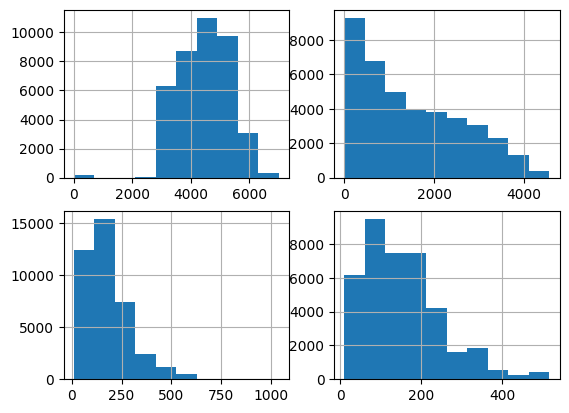

In [738]:
fig, ax = plt.subplots(2, 2)

final_df['demand'].hist(ax=ax[0,0])
final_df['wind'].hist(ax=ax[0,1])
final_df['gb_price'].hist(ax=ax[1,0])
final_df['hist_gas_price'].hist(ax=ax[1,1])


<AxesSubplot: >

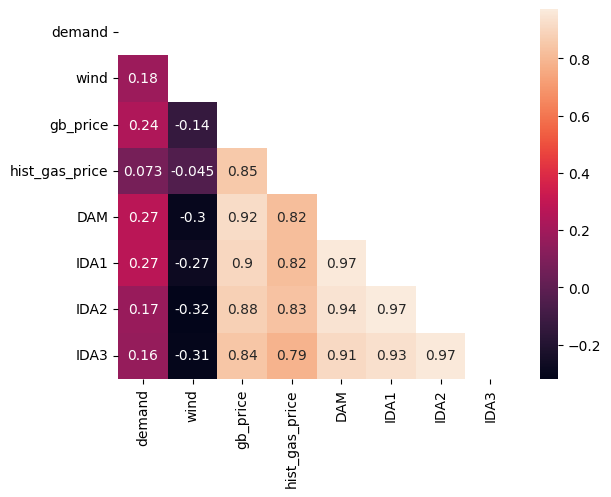

In [739]:
corr_matrix = final_df[['demand','wind','gb_price','hist_gas_price', 'DAM', 'IDA1', 'IDA2', 'IDA3']].corr()

# Plot the correlation matrix using Seaborn heatmap
sns.heatmap(corr_matrix, annot=True, mask=np.triu(np.ones_like(corr_matrix.corr())))

In [740]:

market_all_time = final_df

market_ida2_time = final_df[final_df.start_time.isin(ida2_trade_time)]

best_market = []
best_market_price = []
for index, row in market_ida2_time.iterrows():
    market_template = ['DAM','IDA1','IDA2','IDA3'] #,'BM']
    tempRow = [row['DAM'],row['IDA1'],row['IDA2'],row['IDA3'] ] #, row['BM']]
    minVal = min(tempRow)
    minvalIndex = tempRow.index(minVal)
    bestMarket = market_template[minvalIndex]
    best_market.append(bestMarket)
    best_market_price.append(minVal)
    
market_ida2_time['best_market'] = best_market
market_ida2_time['best_market_price'] = best_market_price

market_ida3_time = final_df[final_df.start_time.isin(ida3_trade_time)]
best_market = []
best_market_price = []
for index, row in market_ida3_time.iterrows():
    market_template = ['DAM','IDA1','IDA2','IDA3'] #,'BM']
    tempRow = [row['DAM'],row['IDA1'],row['IDA2'],row['IDA3'] ] #, row['BM']]
    minVal = min(tempRow)
    minvalIndex = tempRow.index(minVal)
    bestMarket = market_template[minvalIndex]
    best_market.append(bestMarket)
    best_market_price.append(minVal)
    
market_ida3_time['best_market'] = best_market
market_ida3_time['best_market_price'] = best_market_price

C:\Users\Varun\AppData\Local\Temp\ipykernel_26968\3511297106.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_ida2_time['best_market'] = best_market
C:\Users\Varun\AppData\Local\Temp\ipykernel_26968\3511297106.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_ida2_time['best_market_price'] = best_market_price
C:\Users\Varun\AppData\Local\Temp\ipykernel_26968\3511297106.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

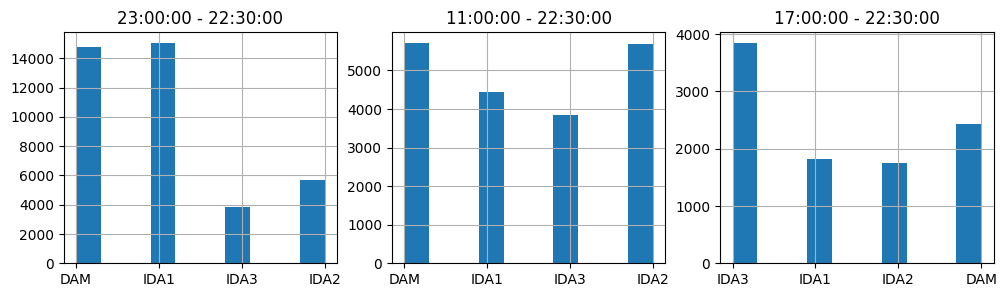

In [741]:

fig, ax = plt.subplots(1, 3, figsize=(12,3))
market_all_time['best_market'].hist(ax=ax[0])
market_ida2_time['best_market'].hist(ax=ax[1])
market_ida3_time['best_market'].hist(ax=ax[2])
ax[0].title.set_text("{} - {}".format(time_slots[min(market_all_time['start_time_cat'])], time_slots[max(market_all_time['start_time_cat'])]))
ax[1].title.set_text("{} - {}".format(time_slots[min(market_ida2_time['start_time_cat'])], time_slots[max(market_ida2_time['start_time_cat'])]))
ax[2].title.set_text("{} - {}".format(time_slots[min(market_ida3_time['start_time_cat'])], time_slots[max(market_ida3_time['start_time_cat'])]))



dam_market = final_df.drop(columns=['IDA1','IDA2', 'IDA3', 'BM', 'net_volume']).dropna()
ida1_market = final_df.drop(columns=['DAM','IDA2', 'IDA3', 'BM', 'net_volume']).dropna()
ida2_market = final_df.drop(columns=['DAM','IDA1', 'IDA3', 'BM', 'net_volume']).dropna()
ida3_market = final_df.drop(columns=['DAM','IDA1', 'IDA2', 'BM', 'net_volume']).dropna()

In [763]:

# first lets bench mark the expense
preferential_df = final_df.copy()

best_market = []
best_market_price = []
for index, row in preferential_df.iterrows():    
    if(row['start_time'] in ida3_trade_time):
        best_market.append('IDA3')
        best_market_price.append(row['IDA3'])
    elif  (row['start_time'] in ida2_trade_time):
        best_market.append('IDA2')
        best_market_price.append(row['IDA2'])
    else:
        best_market.append('IDA1')
        best_market_price.append(row['IDA1'])
    
preferential_df['best_market'] = best_market
preferential_df['best_market_price'] = best_market_price

expense = pd.DataFrame(columns=['Strategy', 'Expense'])

benchmark = final_df['best_market_price'].sum() * 100
dam_market_expense = final_df['DAM'].sum() * 100
ida1_market_expense = final_df['IDA1'].sum() * 100
BM_market_expense = final_df['BM'].sum() * 100
intra_preferential_market_expense = preferential_df['best_market_price'].sum() * 100

expense.loc[len(expense.index)] = ['Benchmark', benchmark]
expense.loc[len(expense.index)] = ['All in DAM', dam_market_expense]
expense.loc[len(expense.index)] = ['All in BM', BM_market_expense]
expense.loc[len(expense.index)] = ['Preferential - IDA3, IDA2, IDA1', intra_preferential_market_expense]


In [783]:
final_df[final_df['year'] == '2020']

,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat,start_date_time,best_market,best_market_price,demand,wind,gb_price,hist_gas_price
0,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.49,2020,0,2020-12-31 23:00:00,DAM,55.09,4209,2690,74.98,57.75
1,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.50,2020,1,2020-12-31 23:30:00,DAM,55.09,4159,2571,74.98,57.75


In [769]:


benchmark_2020 = final_df[final_df['year'] == '2020']['best_market_price'].sum() * 100
benchmark_2021 = final_df[final_df['year'] == '2021']['best_market_price'].sum() * 100
benchmark_2022 = final_df[final_df['year'] == '2022']['best_market_price'].sum() * 100
benchmark_2023 = final_df[final_df['year'] == '2023']['best_market_price'].sum() * 100

dam_2020 = final_df[final_df['year'] == '2020']['DAM'].sum() * 100
dam_2021 = final_df[final_df['year'] == '2021']['DAM'].sum() * 100
dam_2022 = final_df[final_df['year'] == '2022']['DAM'].sum() * 100
dam_2023 = final_df[final_df['year'] == '2023']['DAM'].sum() * 100

BM_2020 = final_df[final_df['year'] == '2020']['BM'].sum() * 100
BM_2021 = final_df[final_df['year'] == '2021']['BM'].sum() * 100
BM_2022 = final_df[final_df['year'] == '2022']['BM'].sum() * 100
BM_2023 = final_df[final_df['year'] == '2023']['BM'].sum() * 100

intra_preferential_market_2020 = preferential_df[preferential_df['year'] == '2020']['best_market_price'].sum() * 100
intra_preferential_market_2021 = preferential_df[preferential_df['year'] == '2021']['best_market_price'].sum() * 100
intra_preferential_market_2022 = preferential_df[preferential_df['year'] == '2022']['best_market_price'].sum() * 100
intra_preferential_market_2023 = preferential_df[preferential_df['year'] == '2023']['best_market_price'].sum() * 100

# dam_market_expense = final_df['DAM'].sum() * 100
# BM_market_expense = final_df['BM'].sum() * 100
# intra_preferential_market_expense = preferential_df['best_market_price'].sum() * 100
print(benchmark_2021, benchmark_2022, benchmark_2023)
print(benchmark_2021 + benchmark_2022 + benchmark_2023 +benchmark_2020 )

218625976.47555554 367123689.5 62949988.06666666
648710672.0422223


In [781]:
pd.set_option('display.float_format', '{:.2f}'.format)
expense['2020'] = [benchmark_2020, dam_2020, BM_2020, intra_preferential_market_2020]
expense['2021'] = [benchmark_2021, dam_2021, BM_2021, intra_preferential_market_2021]
expense['2022'] = [benchmark_2022, dam_2022, BM_2022, intra_preferential_market_2022]
expense['2023'] = [benchmark_2023, dam_2023, BM_2023, intra_preferential_market_2023]
expense.set_index('Strategy')

,Expense,2020,2021,2022,2023
Strategy,,,,,
Benchmark,648710672.04,11018.00,218625976.48,367123689.50,62949988.07
All in DAM,706775954.07,11018.00,239845273.40,399314387.34,67605275.33
All in BM,709344595.27,4283.00,243142922.83,396490502.20,69706887.23
"Preferential - IDA3, IDA2, IDA1",692889228.23,15421.00,232312907.91,393468666.28,67092233.03


Strategy
Benchmark                         648710672.04
All in DAM                        706775954.07
All in BM                         709344595.27
Preferential - IDA3, IDA2, IDA1   692889228.23
dtype: float64

,0
DAM,38.92
IDA1,40.58
IDA2,33.40
IDA3,34.60


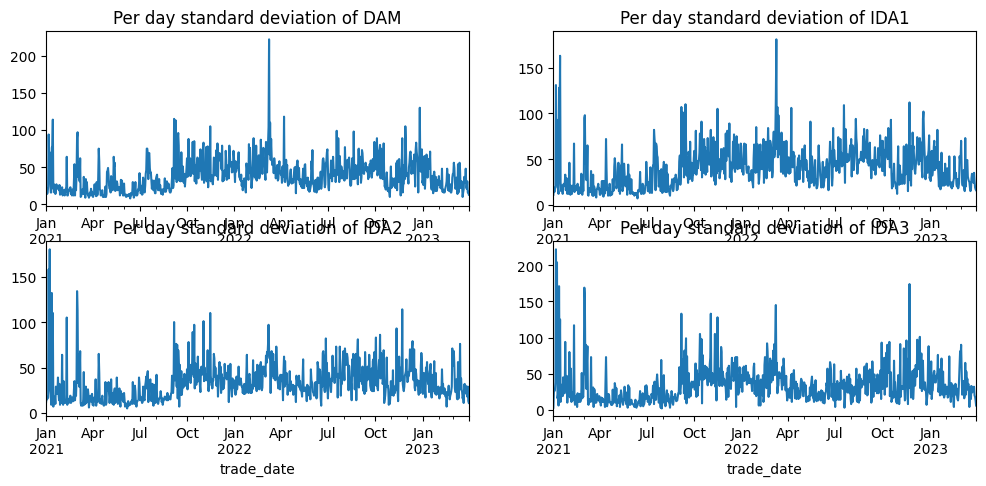

In [788]:
sd_df = final_df.copy()

sd_df1 = sd_df.groupby('trade_date')['DAM'].std().round()
sd_df2 = sd_df.groupby('trade_date')['IDA1'].std().round()
sd_df3 = sd_df.groupby('trade_date')['IDA2'].std().round()
sd_df4 = sd_df.groupby('trade_date')['IDA3'].std().round()

fig, ax = plt.subplots(2, 2, figsize=(12,5))
sd_df1.plot(ax=ax[0,0])
sd_df2.plot(ax=ax[0,1])
sd_df3.plot(ax=ax[1,0])
sd_df4.plot(ax=ax[1,1])
ax[0,0].title.set_text('Per day standard deviation of DAM')
ax[0,1].title.set_text('Per day standard deviation of IDA1')
ax[1,0].title.set_text('Per day standard deviation of IDA2')
ax[1,1].title.set_text('Per day standard deviation of IDA3')


pd.DataFrame([sd_df1.mean(), sd_df2.mean(), sd_df3.mean(), sd_df4.mean()],index=['DAM', 'IDA1', 'IDA2', 'IDA3'] )

# fig, ax = plt.subplots(2, 2, figsize=(12,5))
# sd_df1.plot(ax=ax[0,0], kind='box')
# sd_df2.plot(ax=ax[0,1], kind='box')
# sd_df3.plot(ax=ax[1,0], kind='box')
# sd_df4.plot(ax=ax[1,1], kind='box')
# ax[0,0].title.set_text('Per day standard deviation of DAM')
# ax[0,1].title.set_text('Per day standard deviation of IDA1')
# ax[1,0].title.set_text('Per day standard deviation of IDA2')
# ax[1,1].title.set_text('Per day standard deviation of IDA3')


In [768]:
final_df

,start_date,trade_date,start_time,DAM,IDA1,IDA2,IDA3,BM,net_volume,year,start_time_cat,start_date_time,best_market,best_market_price,demand,wind,gb_price,hist_gas_price
0,2020-12-31,2021-01-01,23:00:00,55.09,87.55,NaN,NaN,16.26,-85.49,2020,0,2020-12-31 23:00:00,DAM,55.09,4209,2690,74.98,57.75
1,2020-12-31,2021-01-01,23:30:00,55.09,66.66,NaN,NaN,26.57,62.50,2020,1,2020-12-31 23:30:00,DAM,55.09,4159,2571,74.98,57.75
2,2021-01-01,2021-01-01,00:00:00,54.02,61.58,NaN,NaN,30.83,-93.05,2021,2,2021-01-01 00:00:00,DAM,54.02,4016,2506,75.53,57.75
3,2021-01-01,2021-01-01,00:30:00,54.02,67.00,NaN,NaN,25.95,-153.72,2021,3,2021-01-01 00:30:00,DAM,54.02,3891,2513,75.53,57.75
4,2021-01-01,2021-01-01,01:00:00,53.00,64.00,NaN,NaN,26.06,-86.30,2021,4,2021-01-01 01:00:00,DAM,53.00,3767,2503,69.65,57.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39349,2023-03-31,2023-03-31,20:30:00,135.80,125.11,115.00,105.00,100.52,-71.11,2023,43,2023-03-31 20:30:00,IDA3,105.00,5243,1764,130.79,104.25
39350,2023-03-31,2023-03-31,21:00:00,132.38,136.68,127.72,119.41,103.30,-128.35,2023,44,2023-03-31 21:00:00,IDA3,119.41,5240,1618,126.24,104.25
39351,2023-03-31,2023-03-31,21:30:00,132.38,125.00,112.70,113.12,103.35,-189.44,2023,45,2023-03-31 21:30:00,IDA2,112.70,5249,1530,126.24,104.25
39352,2023-03-31,2023-03-31,22:00:00,121.40,131.25,121.00,119.17,103.97,-112.74,2023,46,2023-03-31 22:00:00,IDA3,119.17,5121,1467,114.18,104.25


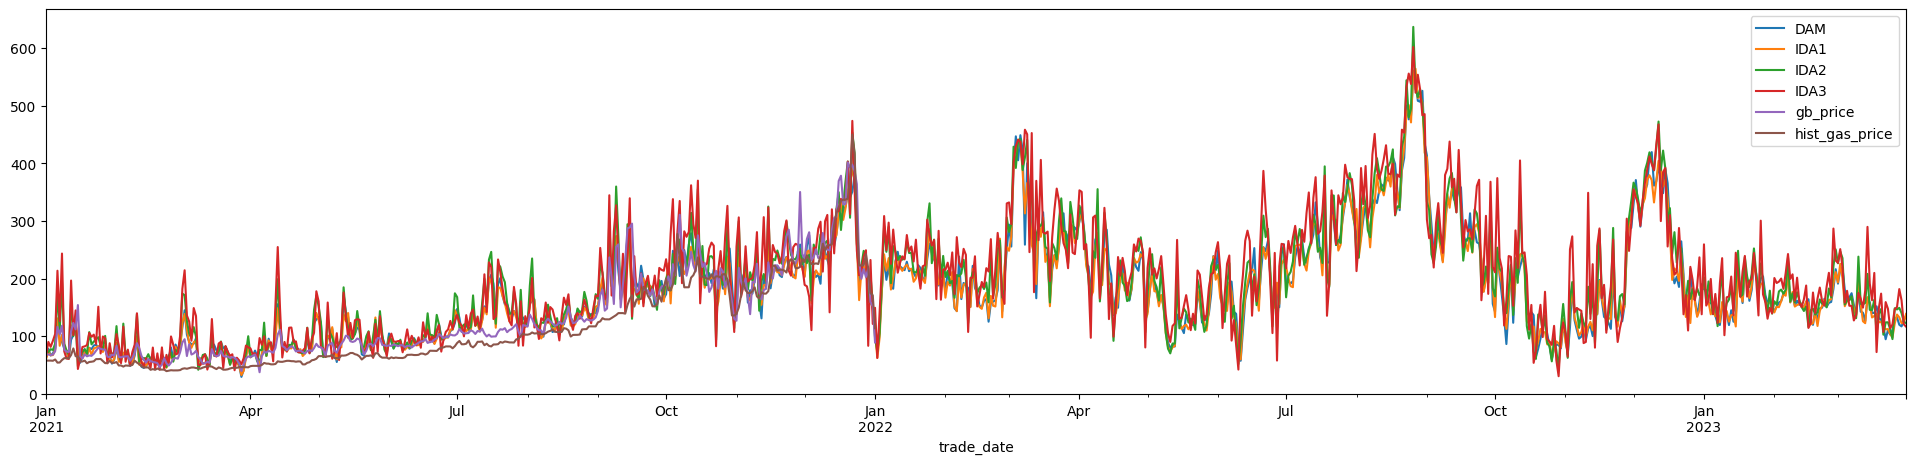

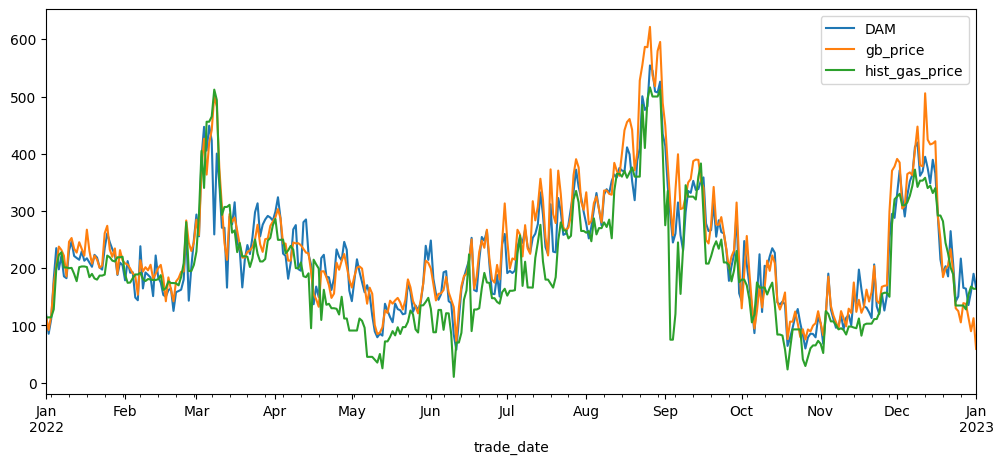

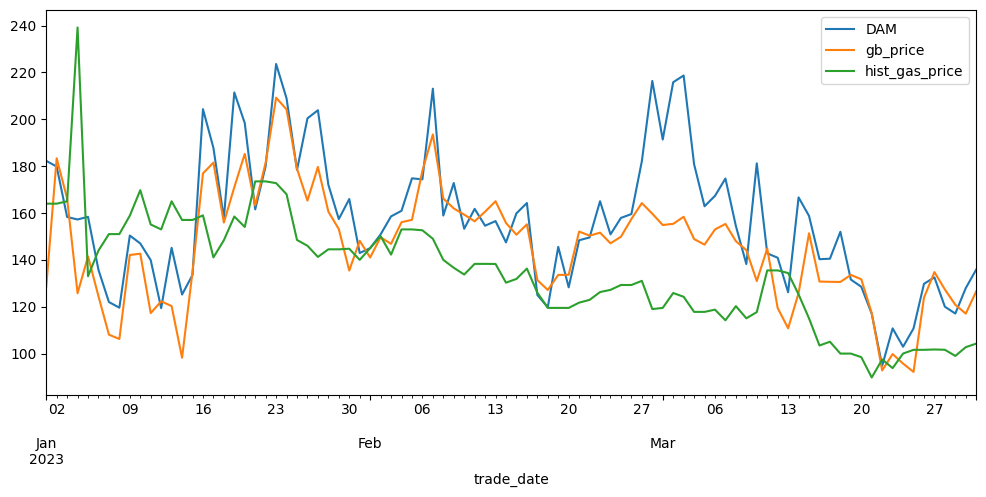

In [785]:
sd_df = final_df.copy()

mean_df1 = sd_df.groupby('trade_date')['DAM'].mean()
mean_df2 = sd_df.groupby('trade_date')['IDA1'].mean()
mean_df3 = sd_df.groupby('trade_date')['IDA2'].mean()
mean_df4 = sd_df.groupby('trade_date')['IDA3'].mean()

sd_df = final_df[final_df['year'] == '2021']
plt.figure(figsize=[24,5])
mean_df1.plot(label="DAM")
mean_df2.plot(label="IDA1")
mean_df3.plot(label="IDA2")
mean_df4.plot(label="IDA3")
sd_df.groupby('trade_date')['gb_price'].mean().plot()
sd_df.groupby('trade_date')['hist_gas_price'].mean().plot()
plt.legend()
plt.show();

sd_df = final_df[final_df['year'] == '2022']
plt.figure(figsize=[12,5])
sd_df.groupby('trade_date')['DAM'].mean().plot(label="DAM")
sd_df.groupby('trade_date')['gb_price'].mean().plot()
sd_df.groupby('trade_date')['hist_gas_price'].mean().plot()
plt.legend()
plt.show();

sd_df = final_df[final_df['year'] == '2023']
plt.figure(figsize=[12,5])
sd_df.groupby('trade_date')['DAM'].mean().plot(label="DAM")
sd_df.groupby('trade_date')['gb_price'].mean().plot()
sd_df.groupby('trade_date')['hist_gas_price'].mean().plot()
plt.legend()
plt.show();


In [115]:
# https://blog.quantinsti.com/build-technical-indicators-in-python/
# https://www.sciencedirect.com/science/article/pii/S2666827021000918
# https://www.semcommittee.com/sites/semc/files/media-files/SEM%20Monthly%20Monitoring%20Report%20-%20July%202022%20-%20Website.pdf



# https://datatofish.com/multiple-linear-regression-python/

In [397]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# X = fm_dam_ida1[['DAM', 'IDA1']]

# vif_info = pd.DataFrame()
# vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif_info['Column'] = X.columns
# vif_info.sort_values('VIF', ascending=False)

In [747]:
final_df.shape

(39354, 18)

In [751]:
# from sklearn.model_selection import GridSearchCV, train_test_split

# X = final_df[['demand','wind','gb_price','hist_gas_price']]
# y = final_df['best_market']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [2, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Create a random forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Use GridSearchCV to search for the best hyperparameters
# grid_search = GridSearchCV(rf_model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate the model with the best hyperparameters on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [749]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

# Load the data into a Pandas DataFrame

# Select the features and target variable
X = final_df[['demand','wind','gb_price','hist_gas_price']]
y = final_df['best_market']

scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Initialize a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.621140896963537


In [759]:
# The Augmented Dickey-Fuller Test (ADF) is a stationarity unit root test. 
# Null hypothesis (H0): The time series data is non-stationary.  
# Alternate hypothesis (H1): The time series is stationary 
# https://analyticsindiamag.com/how-to-make-a-time-series-stationary/

# to reject null hypothesis p value should be less than critical value

isStationery = []

for col in ['DAM', 'IDA1', 'IDA2', 'IDA3', 'BM', 'wind', 'demand', 'gb_price']:
    result=adfuller (final_df[col].dropna())
    print('Test Statistic: %f' %result[0])
    test_stat = result[0]

    crticial_5 = result[4]['5%']

    if(test_stat > crticial_5):
        isStationery.append('non stationery')
        print(col, 'non stationery')
    else:
        isStationery.append('stationery')
        print(col, 'stationery')
        


Test Statistic: -6.918735
DAM stationery
Test Statistic: -6.734050
IDA1 stationery
Test Statistic: -4.977877
IDA2 stationery
Test Statistic: -5.211834
IDA3 stationery
Test Statistic: -10.136154
BM stationery
Test Statistic: -13.359777
wind stationery
Test Statistic: -11.210358
demand stationery
Test Statistic: -5.109259
gb_price stationery


In [839]:
final_df.columns

Index(['start_date', 'trade_date', 'start_time', 'DAM', 'IDA1', 'IDA2', 'IDA3',
       'BM', 'net_volume', 'year', 'start_time_cat', 'start_date_time',
       'best_market', 'best_market_price', 'demand', 'wind', 'gb_price',
       'hist_gas_price'],
      dtype='object')

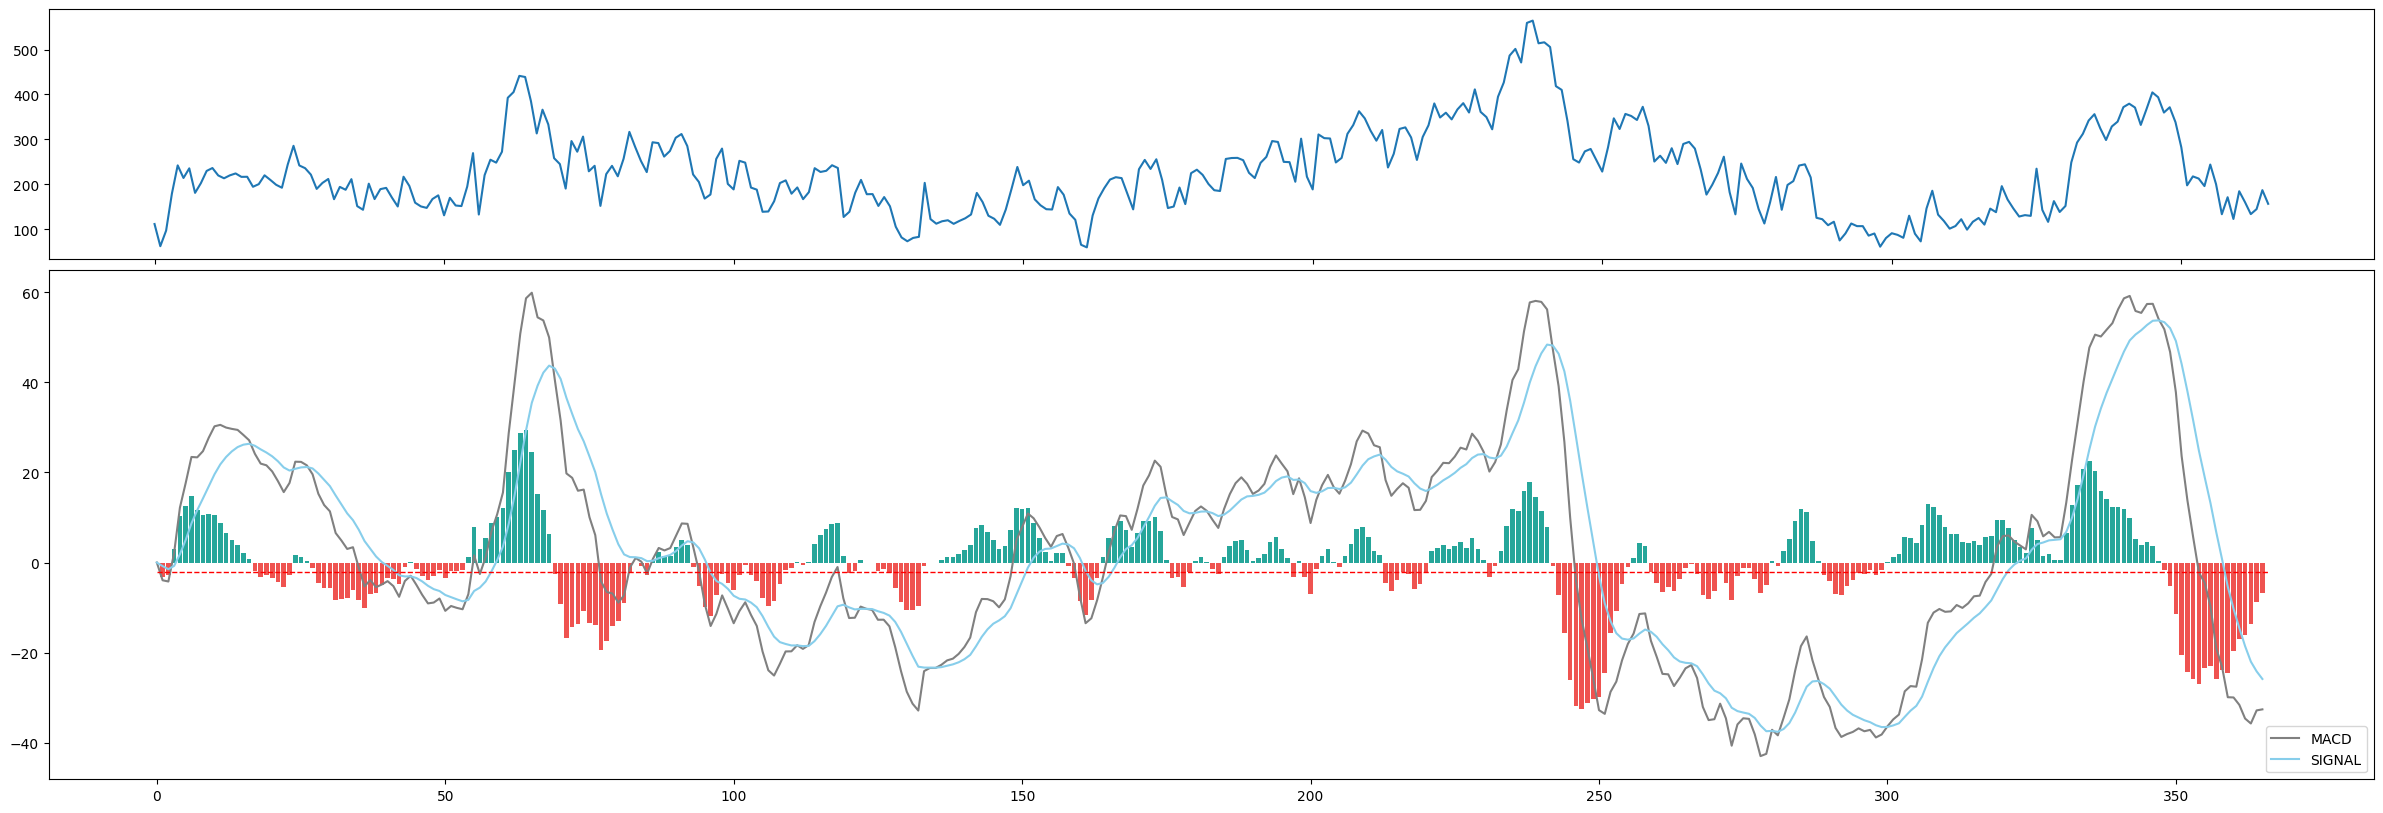

In [840]:
plt.rcParams['figure.figsize'] = (30,10)

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'IDA1':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

data = final_df[final_df['year'] == '2022'].groupby('trade_date')['IDA1'].mean().reset_index(drop=True)
macd_data = get_macd(data, 26, 12, 9)
macd_data

def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((12,2), (0,0), rowspan = 4, colspan = 2)
    ax2 = plt.subplot2grid((12,2), (4,0), rowspan = 8, colspan = 2)

    ax1.plot(prices, label = 'IDA1')
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')
    
    ax2.hlines(y=-2, xmin=0, xmax=len(prices), colors='r', linestyles='--', lw=1)

    plt.legend(loc = 'lower right')

plot_macd(data, macd_data['macd'], macd_data['signal'], macd_data['hist'])